# LAB 4

In [1]:
import numpy as np
X = np.random.randn (50 , 2)
X[0:25, 0] = X[0:25, 0]+3
X[0:25, 1] = X[0:25, 1]-4

Text(0, 0.5, 'X2')

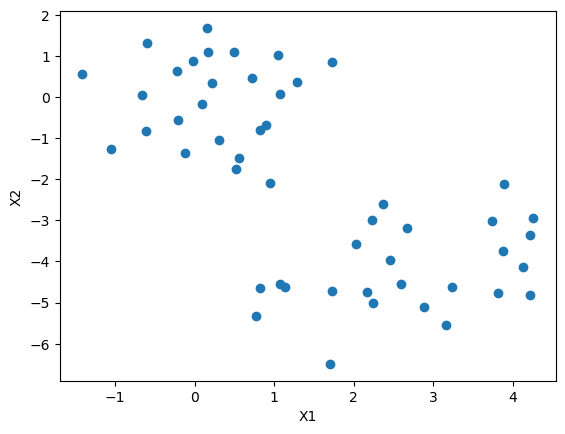

In [2]:
import matplotlib.pyplot as plt
plt.plot (X[:,0] , X[:,1], "o")
plt.xlabel("X1")
plt.ylabel("X2")

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2 , random_state = 100).fit(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'X2')

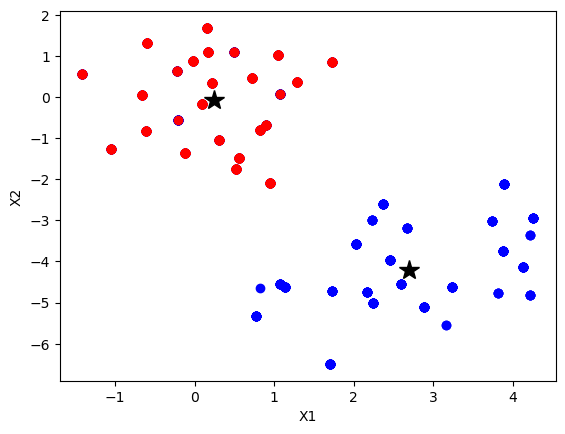

In [4]:
for i in range (0,X.shape[0]):
    if kmeans.labels_[i]==0:
        plt.plot(X[i:,0], X[i:,1], "o", color="red")
    else:
        plt.plot(X[i:,0], X[i:,1], "o", color="blue")
centroid1=kmeans.cluster_centers_[0]
centroid2=kmeans.cluster_centers_[1]
plt.plot(centroid1[0], centroid1[1], "*", color="black", markersize=15)
plt.plot(centroid2[0], centroid2[1], "*", color="black", markersize=15)
plt.xlabel("X1")
plt.ylabel("X2")

In [5]:
#import the pandas library
import pandas as pd
# Read the CSV file
Live = pd.read_csv("Live_20210128.csv")

In [6]:
Live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [7]:
# Drop the last 4 columns
Live = Live.drop(Live.columns[-4:], axis=1)

In [8]:
Live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [9]:
#establish the descriptive statistics of the dataset
print(Live.describe())

         status_id  num_reactions  num_comments   num_shares    num_likes  \
count  7050.000000    7050.000000   7050.000000  7050.000000  7050.000000   
mean   3525.500000     230.117163    224.356028    40.022553   215.043121   
std    2035.304031     462.625309    889.636820   131.599965   449.472357   
min       1.000000       0.000000      0.000000     0.000000     0.000000   
25%    1763.250000      17.000000      0.000000     0.000000    17.000000   
50%    3525.500000      59.500000      4.000000     0.000000    58.000000   
75%    5287.750000     219.000000     23.000000     4.000000   184.750000   
max    7050.000000    4710.000000  20990.000000  3424.000000  4710.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  7050.000000  
mean     12.728652     1.289362     0.696454     0.243688     0.113191  
std      39.972930     8.719650     3.957183     1.597156     0.726812  
min       0.00

In [10]:
#determine the number of observations and variables in the dataset
print(f"Number of observations: {Live.shape[0]}")
print(f"Number of variables: {Live.shape[1]}")

Number of observations: 7050
Number of variables: 12


Comments on the results of the descriptive statistics

For each feature (10 of the 12 features are displayed since 2 of them are non numeric hence no statistics for them) there are 7050 observations which are depicted in the count row. The mean of the observations per variable in the dataset is shown next, being the weighted average obtained. The standard deviation (std) shows how dispersed the data is from the mean and it is very instrumental in telling us about the dataset.

the minimum value of each observation for each variable (i.e. in each column is shown on the min row likewise the maximum value is in the max row (the last row in the description (i.e. max).

The 25% represents the 25th percentile of each column, that is, the value at which 25% of the values in this column lie below. The 50% represents the 50th percentile which is the median, which cuts the data in each column of the dataset into half. The 75% presents the 75th percentile, which means 75% of the values lie above this particular value. For example, using the “num_reactions” feature column, the 75% is 219.0, which means ¾ of the values in this column lie above 219.0.

Do you think is it suitable to scale the data before performing clustering analysis? Justify your
answer.

Yes it is best to scale the data. 
This is because an unstandardized or unscaled data would affect the clustering results.
Based on the statistics obtained in this case, the features have different scales, and the standard deviations vary. For example, "num_reactions" has a much smaller standard deviation compared to "num_sads" or "num_angrys". This indicates that the features have varying scales. Additionally, the "min" and "max" values for each feature, like "num_comments" and "num_angrys" have a wide range of values, including potential outliers that could affect the performance of some Kmeans clustering algorithm.

In [11]:
#Extract the desired features.
live_selected = Live[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']]
#Handle missing values and replace with the mean value
live_selected = live_selected.fillna(live_selected.mean())

In [12]:
#Scale the selected features using StandardScaler from sklearn.preprocessing.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
live_scaled = scaler.fit_transform(live_selected)

In [13]:
#Prepare the scaled dataset as a pandas DataFrame
live_scaled_df = pd.DataFrame(live_scaled, columns=live_selected.columns)

In [14]:
live_scaled_df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves
0,0.646104,0.323350,1.686879,0.482727,1.983266
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454
2,-0.006738,0.013089,0.129017,-0.024571,0.206938
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286


In [15]:
#Perform K-means clustering with K = 4 considering
from sklearn.cluster import KMeans
# Perform K-means clustering with K = 4
Live_Kmeans4 =KMeans(n_clusters = 4 , n_init = 50 , random_state = 1000).fit(live_scaled_df)
# Get the labels assigned by K-means clustering
Live_Kmeans4_labels=Live_Kmeans4.labels_
Live_Kmeans4_labels

array([2, 1, 1, ..., 1, 1, 1])

# Compare the assigned labels with the true labels
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(live_scaled_df[0], Live_Kmeans4_labels)
print('Accuracy: ', accuracy)

In [16]:

pd.crosstab(index = Live.status_type ,
            columns = Live_Kmeans4_labels ,
            rownames = ['Real groups'] ,
            colnames = ['K-means clusters'])

K-means clusters,0,1,2,3
Real groups,,,,
link,14,49,0,0
photo,221,4063,3,1
status,78,287,0,0
video,77,1516,625,116


# Comment on the results.

Each row in the table corresponds to a real group, and each column corresponds to a K-means cluster. The numbers in the table represent the counts of data points falling into each combination of real groups and K-means clusters.

Here is an interpretation of the table:

"Real groups" are the actual categories or classes of our data points.

"K-means clusters" are the clusters created by the K-means algorithm.

Based on the numbers in the table, we make the following observations:

"link," "photo," "status," and "video" are four the real groups or categories.


The K-means algorithm created four clusters (0, 1, 2, and 3).

The numbers in each cell represent the counts of data points that belong to both the real group and the K-means cluster.

For example, there are 14 data points in the "link" real group that were assigned to K-means cluster 0, 49 data points in the "link" real group assigned to K-means cluster 1, and etc.

Based on the numbers, it is observed that K-means cluster 1 has the most significant number of data points across the real groups.

The "link" real group is primarily assigned to K-means clusters 0 and 1.

The "photo" real group is primarily assigned to K-means cluster 1.

The "video" real group is primarily assigned to K-means clusters 2 and 3.

The "status" real group is primarily assigned to K-means cluster 1.

In [17]:
distortions = []
# Calculate inertia for different numbers of clusters
K = range (1 , 16)
for k in K:
    kmeanModel = KMeans(n_clusters=k , n_init = 50 , random_state =1000)
    kmeanModel.fit(live_scaled_df)
    distortions.append(kmeanModel.inertia_)

# Make a plot and choose the best number of clusters. Justify your answer.
Seee the plot below.

The best number of clusters is 3.
Justify:
We observe the plot for the "elbow point" where the inertia values start to level off or the point where the inertia starts to decrease at a slower rate. Hence, the optimal number of clusters (k) is expected to be located at or near this point. Consequently, we chose k as 3. 

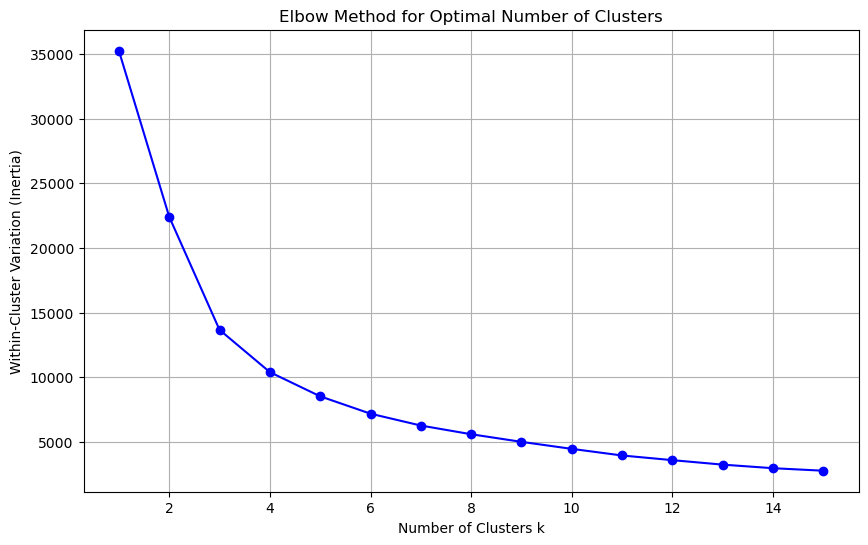

In [18]:
# Create a plot to visualize the results
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters k')
plt.ylabel('Within-Cluster Variation (Inertia)')
plt.grid(True)
plt.show()

In [19]:
# Chosen value of K 
optimal_k = 3  

# Initialize the K-means model with the chosen K
kmeans = KMeans(n_clusters=optimal_k, n_init = 50, random_state =1000)

# Fit the model to your data (replace X with your data)
#kmeans.fit(X)
#kmeanModel.fit(live_scaled_df)
# Get the cluster assignments for each data point
cluster_assignments = kmeans.fit_predict(live_scaled_df)

In [20]:
kmeans_labels=kmeans.labels_
kmeans_labels

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
print(np.unique(kmeans_labels))
print(kmeans_labels.size)

[0 1 2]
7050


In [22]:
#print(live_scaled_df.head())
#print(live_scaled_df.columns)
#print(Live.status_type.head())
print(cluster_assignments.dtype)
print(np.unique(cluster_assignments))
print(cluster_assignments.size)

int32
[0 1 2]
7050


In [24]:
#using K=3
Live_Kmeans3 = KMeans(n_clusters=3, n_init=50, random_state=1000).fit(live_scaled_df)
Live_Kmeans3_labels = Live_Kmeans3.labels_
pd.crosstab(index =Live.status_type, 
           columns = Live_Kmeans3_labels,
           rownames = ['Real groups'],
           colnames = ['K-Means clusters'])

K-Means clusters,0,1,2
Real groups,,,
link,49,0,14
photo,4075,2,211
status,295,0,70
video,1916,342,76


# interpret the results.

link: In real group "link," 49 data points were assigned to Cluster 0, 0 data points were assigned to Cluster 1, and 14 data points were assigned to Cluster 2 by the K-Means algorithm.

photo: In real group "photo," 4,075 data points were assigned to Cluster 0, 2 data points were assigned to Cluster 1, and 211 data points were assigned to Cluster 2.

status: In real group "status," 295 data points were assigned to Cluster 0, 0 data points were assigned to Cluster 1, and 70 data points were assigned to Cluster 2.

video: In real group "video," 1,916 data points were assigned to Cluster 0, 342 data points were assigned to Cluster 1, and 76 data points were assigned to Cluster 2.

The K-Means algorithm grouped the data into three clusters (0, 1, and 2).

In Cluster 0, it assigned data points primarily from the "photo" and "video" real groups.

In Cluster 1, it assigned data points from the "video" real group.

In Cluster 2, it assigned data points from all the real groups but primarily from "link," "photo," and "status."


# 2.2

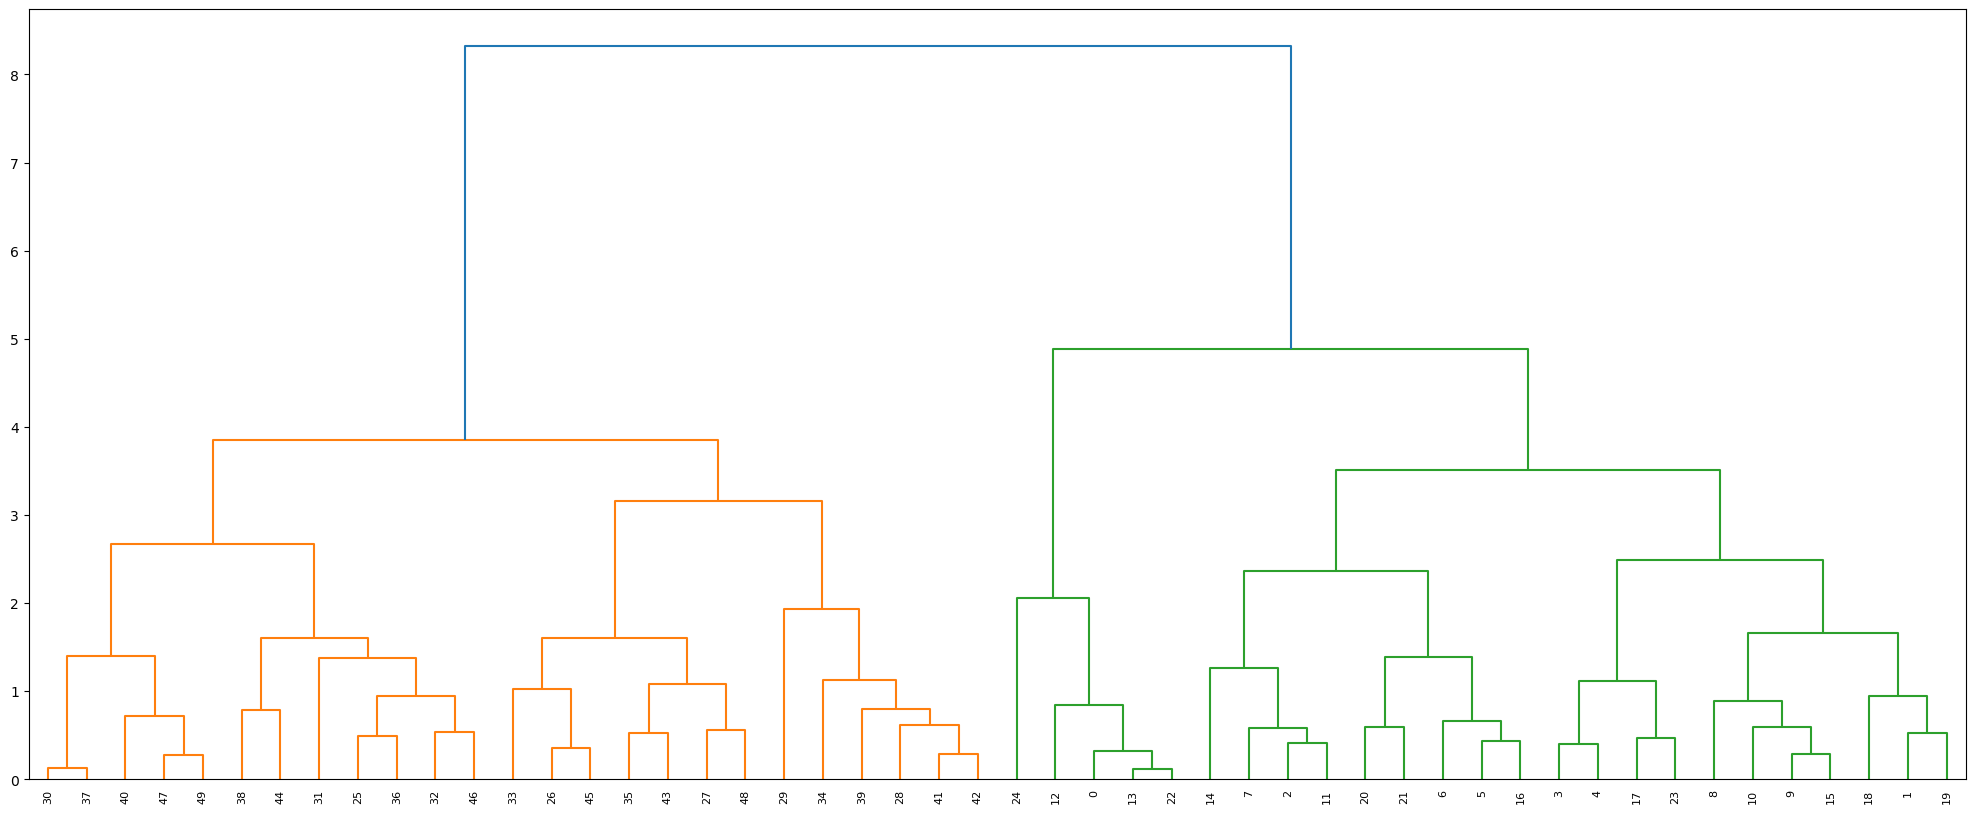

In [25]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
hc_complete = linkage(X, "complete")
plt.figure(figsize=(25,10))
dendrogram(hc_complete)
plt.show()

In [26]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters=2).T)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [27]:
# Performing Hierarchical clustering on our dataset
hc_completeH = linkage(live_scaled_df, "complete")
hc_cut = (cut_tree(hc_completeH, n_clusters=4).T)
print(hc_cut)

[[0 0 0 ... 0 0 0]]


In [28]:
pd.crosstab(index =Live.status_type, 
           columns = hc_cut.T[0], 
           rownames = ['Real groups'],
           colnames = ['Clusters'])

Clusters,0
Real groups,
link,63
photo,4288
status,365
video,2334


#
There is only one (1) cluster after the cut, Category photo has the major observations in the cluster with 4288, seconded by video with 2334, then status with 365 and the loweest category being link with 63.

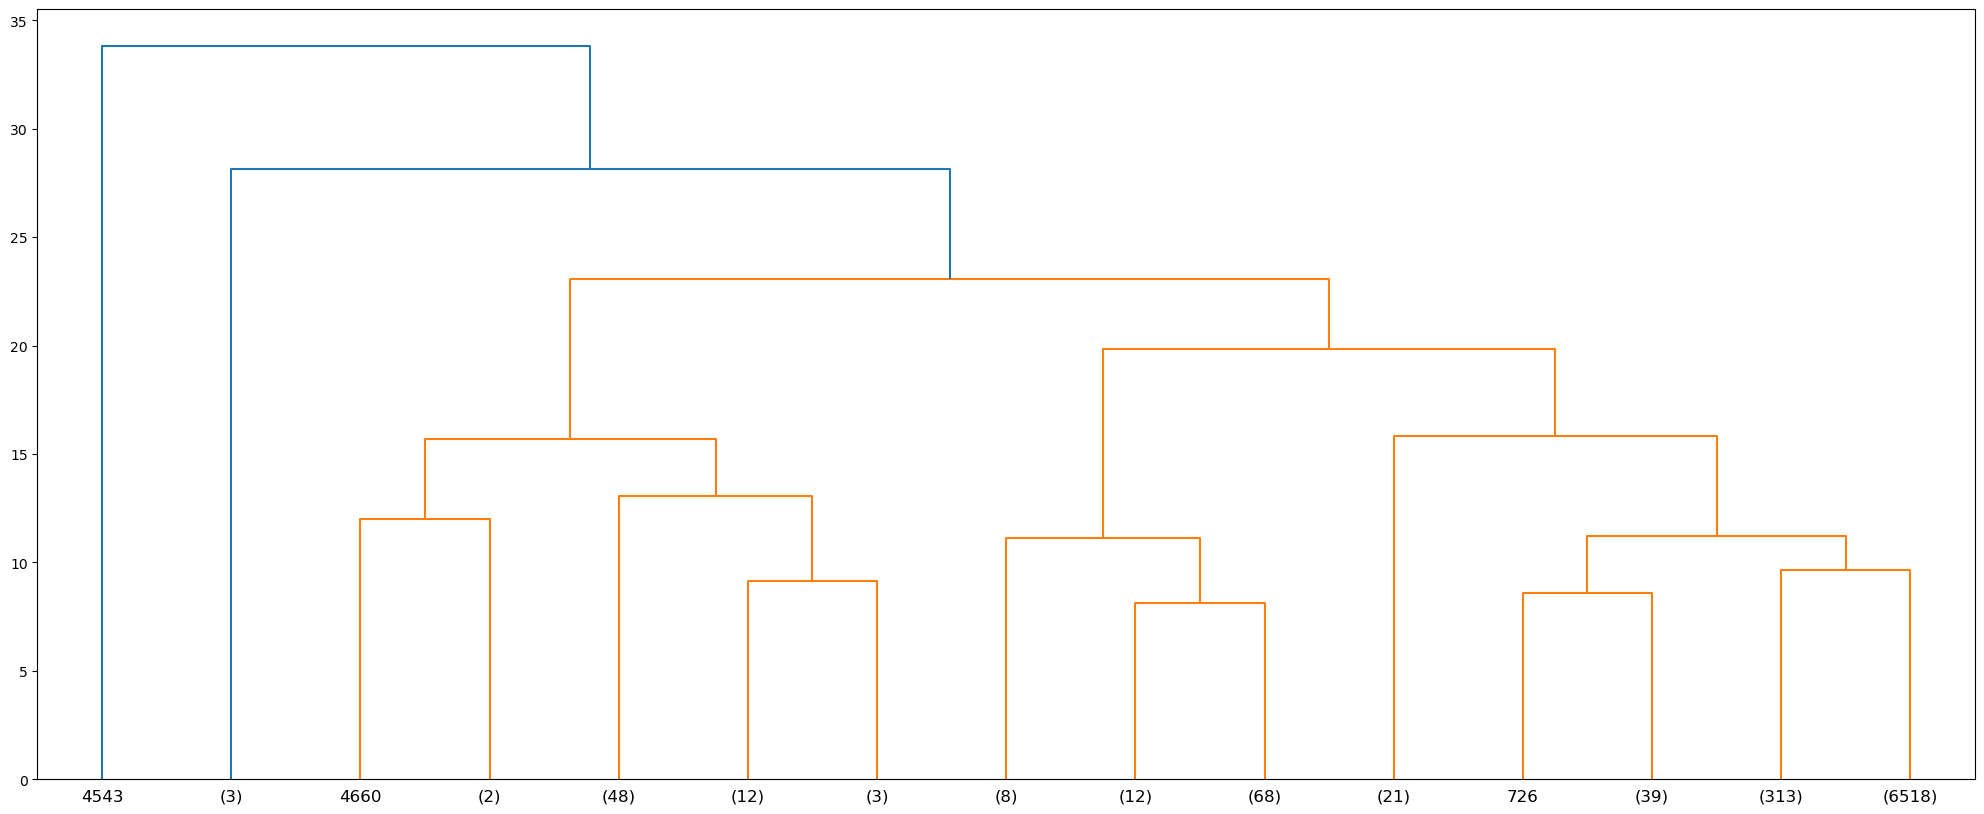

In [29]:
plt.figure(figsize=(25,10))
dendrogram(hc_completeH, truncate_mode='lastp', p=15)
plt.show()

#
The cutoff will be at 25 and 3 clusters will immerge from the visual representatio of the dendogram. This is because the higher the height of the fusion, the less similar the objects are. The distance of the branches of cluster 3 are longer, so cutting off at 25 is good.

In [30]:
# Silhouette for k-means
from sklearn.metrics import silhouette_score, davies_bouldin_score
km = KMeans(n_clusters=6, n_init=50, random_state=1000).fit(live_scaled_df)
score = silhouette_score(live_scaled_df, km.labels_, metric='euclidean')

# Calculate Davies-Bouldin index Score for k-means 
db_index = davies_bouldin_score(live_scaled_df, km.labels_)
print('Silhouetter Score for K-means: %.3f' % score)
print('Davies-Bouldin index for K-means:%.3f' % db_index)

Silhouetter Score for K-means: 0.746
Davies-Bouldin index for K-means:0.778


In [31]:
# Silhouette for hierarchical
hc_completeS = linkage(live_scaled_df, "complete")
hc_cutSh = (cut_tree(hc_completeS, n_clusters=6).T)
score_s = silhouette_score(live_scaled_df, np.ravel(hc_cutSh.T), metric='euclidean')
# Calculate Davies-Bouldin index Score for hierarchical
db_index_s = davies_bouldin_score(live_scaled_df, np.ravel(hc_cutSh.T))
print('Silhouetter Score for Hierarchical Clustering: %.3f' % score_s)
print('Davies-Bouldin index for Hierarchical Clustering :%.3f' % db_index_s)

Silhouetter Score for Hierarchical Clustering: 0.776
Davies-Bouldin index for Hierarchical Clustering :0.563


The Silhouette score for Hierarchical clustering is higher than that of K-means, but that notwithstanding, from the two scores, it shows that the dataset contains more distinct clusters (i.e. clusters are dense and well separated). For Davies-Bouldin index score, the score of K-means is higher than that of Hierarchical clustering with quite a wide gap, which implies that the DB index of hierarchical is better than silhouette, as distance between clusters’ centroids are measured. It shows that the hierarchical model has better separation between the clusters than that of k-means model.

In conclusion, base on the two metrics, hierarchical clustering performed better than k-means clustering by showing there the clusters are densed and well separated.